In [1]:
import pickle
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from dist_rsa.debugging.low_dim.l1 import l1_model
%matplotlib inline


/home/rcohngordon/dist-rsa/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def titrate(size,amount,l1_sig1,subj, quds,only_trivial,pred,just_s1,possible_utterances,mixture_variational,discrete,just_l0=False,sig1=0.1,sig2=0.1,variational=False,step_size=1e-3):
    results = l1_model(subj=subj,
                             pred=pred,
                             sig1=sig1,
                             sig2=sig2,
                             l1_sig1=l1_sig1,
                             resolution=(size,amount),
                             quds=quds,
                             only_trivial=only_trivial,
                             just_s1=just_s1,
                             just_l0=just_l0,
                             possible_utterances=possible_utterances,
                             discrete=discrete,
                             variational=True,
                             step_size=step_size,
                             mixture_variational=mixture_variational,
                            )


#     n=np.asarray([1 if x[1]==3 or x[0]==3 else 0 for x in results[1]])
# #     print(results[0].shape)
# #     print(n.shape)
#     print("\n\n\nRESULTS\n\n\n")
#     print(n)
#     n=np.reshape(n,(size*2,size*2))
    
#     hm = pnd.DataFrame(n,columns=np.arange(-size,size)*amount,index=np.arange(-size,size)*amount)
#     seaborn.heatmap(hm)
    
#     return None
    if mixture_variational:
        print(results.inference_params.heatmap)
        hm = pnd.DataFrame((results.inference_params.heatmap),columns=np.arange(-size,size+1)*amount,index=np.arange(-size,size+1)*amount)
        seaborn.heatmap(hm)
    if discrete:
#         if not just_s1:
#             print("QUDS: ", list(zip(quds,np.exp(results[-1]))))
        print(results.tf_results[0])
        hm = pnd.DataFrame((results.tf_results[0]),columns=np.arange(-size,size+1)*amount,index=np.arange(-size,size+1)*amount)
#         print(hm)

        seaborn.heatmap(hm)
    
#     else: print("QUDS",[(x,np.exp(y)) for (x,y) in results[-1]])
#         results[0][size,:]=0.75
#         results[0][:,size]=0.75
#         results[0][size,size+3]=2
#         results[0][size,size+1]=2




UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
RUNNING DISCRETE MODEL
QUDS: [['vicious']]
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
MEAN [7.3351556e-01 1.2845703e-08]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.7024645e-05
  5.6465680e-05 5.5906650e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.7594854e-05
  5.7030356e-05 5.6465680e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.8164995e-05
  5.7594854e-05 5.7024645e-05]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.8164995e-05
  5.7594854e-05 5.7024645e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.7594854e-05
  5.7030356e-05 5.6465680e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 5.7024645e-05
  5.6465680e-05 5.5906650e-05]]


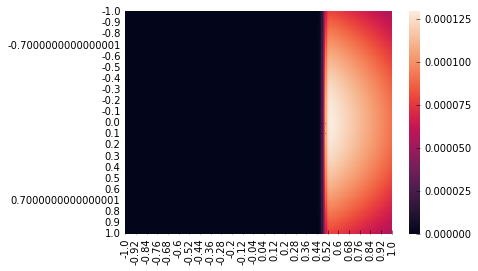

In [5]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['vicious']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_1:0", shape=(40401, 2), dtype=float32)
['vicious'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
shapes of discrete_worlds_along_qud_prior and fixed_s1_scores Tensor("map/TensorArrayStack/TensorArrayGatherV3:0", shape=(201,), dtype=float32) Tensor("strided_slice_203:0", shape=(201,), dtype=float32)
probs and support Tensor("Exp:0", shape=(201,), dtype=float32) Tensor("Squeeze_2:0", shape=(201,), dtype=float32)
subspace_mean 0.7335206
orthog dims, qud Tensor("strided_slice_206:0", shape=(2, 1), dtype=float32) Tensor("strided_slice_207:0", shape=(2, 1), dtype=

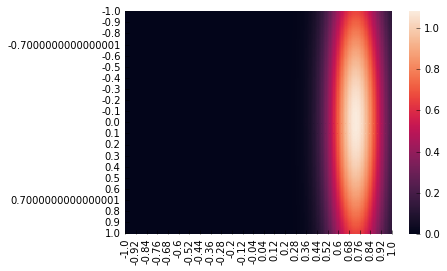

In [3]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)

In [5]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious',"swims"],possible_utterances=["shark","swimmer","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

UTTERANCES:
 ['man', 'shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 3 possible utterances and 2
RUNNING DISCRETE MODEL
QUDS: [['swims'], ['vicious']]
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
MEAN [0.48628807 0.24845102]


ValueError: Shape of passed values is (201, 201), indices imply (200, 200)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate swimmer
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['swims']]
quds 1
QUD MATRIX Tensor("Cast_83:0", shape=(1, 2, 1), dtype=float32) [[[0.]
  [1.]]]
['swims'] CURRENT QUD
projected listener world [0.]
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
['shark', 'swimmer']
[0.49999976 0.49999976] likelihoods
1000/1000 [100%] ██████████████████████████████ Elapsed: 1s | Loss: 2.501
SUBSPACE MEAN [0.]
full mean [0. 0.]
subspace variance [0.01]
(1, 2, 2) (1, 1, 2)
(1, 2) shape out


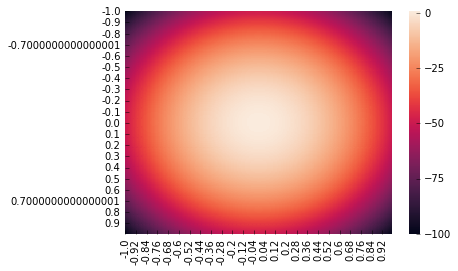

In [22]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['swims'],possible_utterances=["shark","swimmer"],pred='swimmer',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 0.1 1.0
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('swims', 0.99999905)]


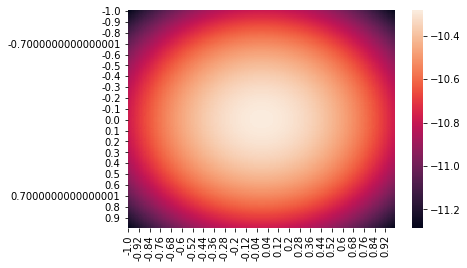

In [29]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=["swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 0.1 1.0
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('vicious', 1.0)]


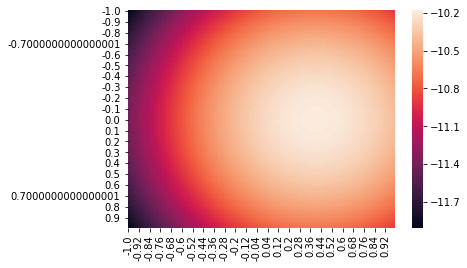

In [30]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=["vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=0.1,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1000.0 1.0
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('swims', 0.5653072), ('vicious', 0.4346945)]


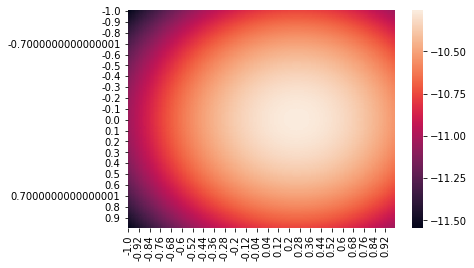

In [43]:
titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=["swims","vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1000.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('swims', 0.5311497), ('vicious', 0.46880502)]


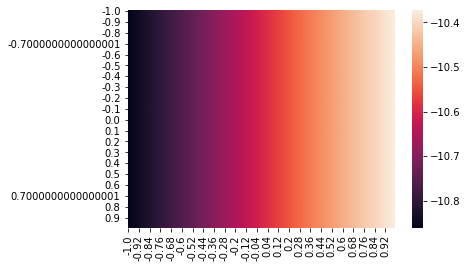

In [33]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["swims","vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('swims', 1.0)]


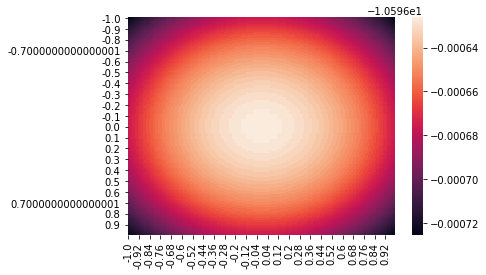

In [34]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 1
(1, 2, 2) (1, 1, 2)
2
QUDS:  [('vicious', 1.0)]


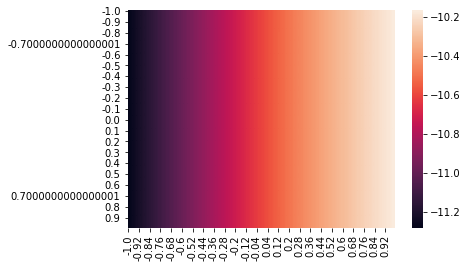

In [35]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["vicious"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.5311497), ('swims', 0.46880502)]


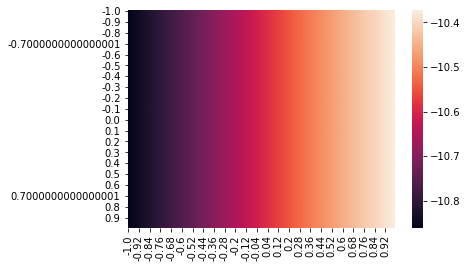

In [39]:
titrate(size=100,amount=0.01,l1_sig1=100.0,subj="man",quds=["vicious","swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 100.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.5200573), ('swims', 0.4799865)]


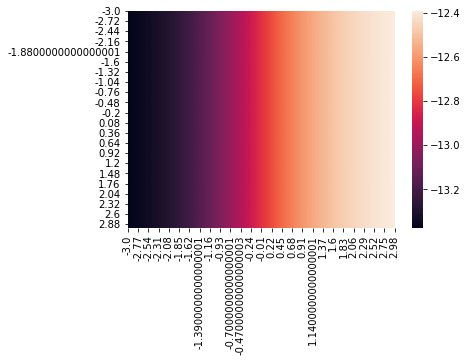

In [46]:
titrate(size=300,amount=0.01,l1_sig1=100.0,subj="man",quds=["vicious","swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

fish not in vecs
UTTERANCES:
 ['shark']
subject: ['man']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 1 possible utterances and 2
(2, 1, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.49998617), ('swims', 0.49998617)]


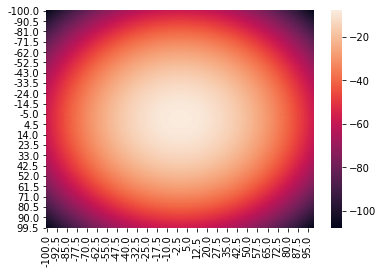

In [47]:
titrate(size=200,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish"],subj="man",pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0)

UTTERANCES:
 ['shark', 'fish']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
FOO
DOUBLE FOO
(2, 2, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.4868942), ('swims', 0.51310563)]


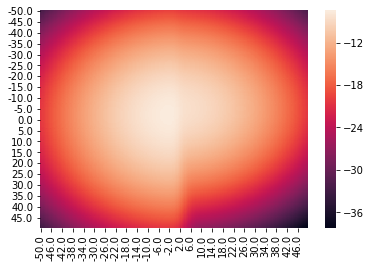

In [19]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.1195329), ('swims', 0.88046676)]


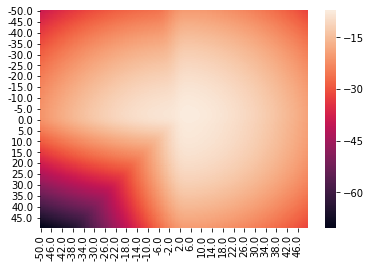

In [20]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.47533825), ('swims', 0.5246618)]


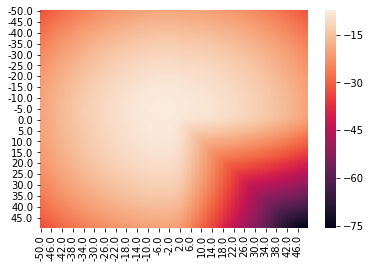

In [21]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)